#### 层次聚类算法

+ 使用西瓜密度和含糖量数据，共30个样本
+ 依次设置聚类数$k=30,29,\cdots,7$
+ 使用AGNES算法聚类
+ 显示算法的聚类过程

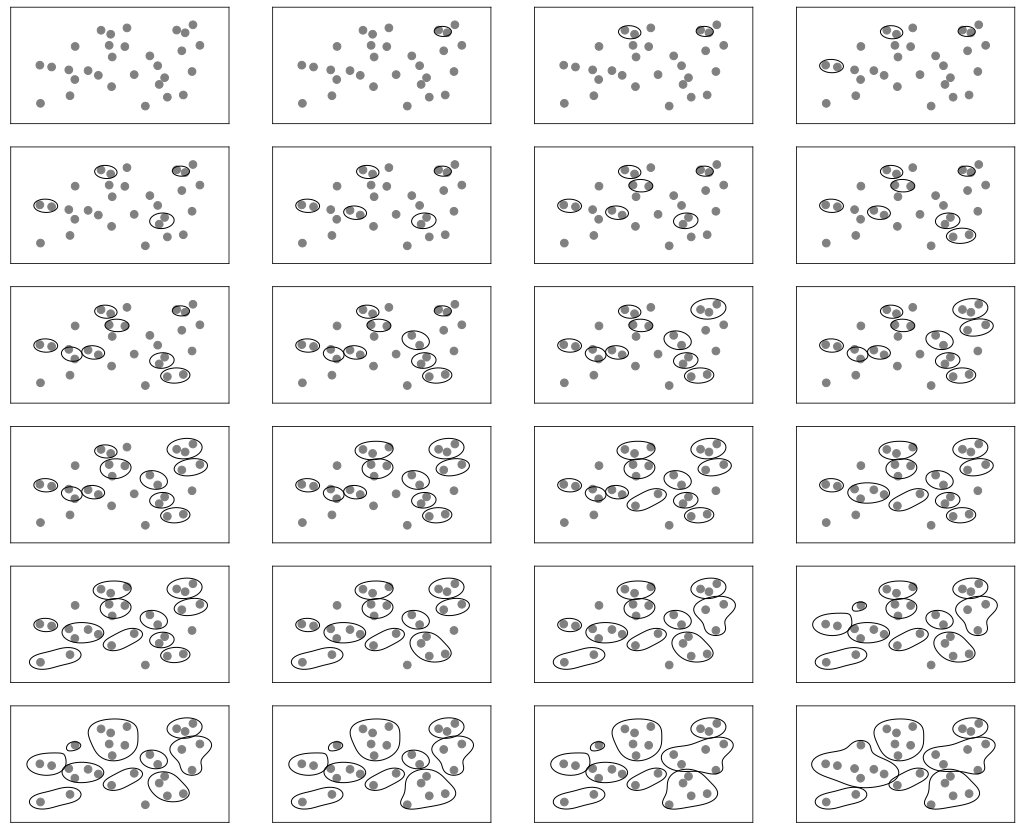

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity

X = np.array([[0.697,0.460],[0.774,0.376],[0.634,0.264],[0.608,0.318],[0.556,0.215],
              [0.403,0.237],[0.481,0.149],[0.437,0.211],[0.666,0.091],[0.243,0.267],
              [0.245,0.057],[0.343,0.099],[0.639,0.161],[0.657,0.198],[0.360,0.370],
              [0.593,0.042],[0.719,0.103],[0.359,0.188],[0.339,0.241],[0.282,0.257],
              [0.748,0.232],[0.714,0.346],[0.483,0.312],[0.478,0.437],[0.525,0.369],
              [0.751,0.489],[0.532,0.472],[0.473,0.376],[0.725,0.445],[0.446,0.459]])

eps = X.std() / 2.
x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

fig, axes = plt.subplots(6,4,figsize=(18, 15))
agg = AgglomerativeClustering(linkage='complete',compute_full_tree=True,n_clusters=7)
for i, ax in zip(range(24),axes.reshape(24,1)):
    agg.n_clusters = X.shape[0] - i
    Labels = agg.fit_predict(X)

    ax[0].scatter(X[:,0], X[:,1], s=60, c='grey')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    ax[0].set_xlim(x_min, x_max)
    ax[0].set_ylim(y_min, y_max)

    bins = np.bincount(agg.labels_)
    for cluster in range(agg.n_clusters):
        if bins[cluster] > 1:
            points = X[Labels==cluster]
            other_points = X[Labels!=cluster]

            kde = KernelDensity(bandwidth=.05).fit(points)
            scores = kde.score_samples(gridpoints)
            score_inside = np.min(kde.score_samples(points))
            score_outside = np.max(kde.score_samples(other_points))
            levels = .8 * score_inside + .2 * score_outside
            ax[0].contour(xx, yy, scores.reshape(100, 100), levels=[levels],colors='k', linestyles='solid', linewidths=1)

plt.show()